In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona.crs
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from folium.plugins import HeatMap
import folium
import branca.colormap as cm

place_name = "Δήμος Θεσσαλονίκης"
# graph = ox.graph_from_place(place_name)
# fig, ax = ox.plot_graph(graph)
# plt.tight_layout()

In [2]:
crs = fiona.crs.from_epsg(2100)

leisure = ox.geometries.geometries_from_place(place_name,  tags = {"amenity":True})
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)


C:\Users\owner\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
b = leisure[leisure['amenity'].str.contains('bar|cafe|nightclub|pub|restaurant', na=False)]
geo_bars = gpd.GeoDataFrame(b, geometry = 'geometry', crs=crs)
geo_bars = geo_bars[geo_bars['geometry'].type == 'Point']
bars = geo_bars[['geometry']]
colormap = cm.LinearColormap(colors=['blue', 'lightgreen', 'red'], index=[1, 3, 5], vmin=0, vmax=5)

stations = pd.DataFrame()
stations['latitude'] = bars.geometry.y
stations['longitude'] = bars.geometry.x

style2 = {'fillColor': '#00000000', 'color': '#000000', 'weight': '1',  'dashArray': ''}

for_map = folium.Map(location=[stations.latitude.values.mean(), stations.longitude.values.mean()], zoom_start=12)
hm_wide = HeatMap(
    list(zip(stations.latitude.values, stations.longitude.values)),
    min_opacity=0.30,
    radius=15, 
    blur=8)
folium.GeoJson(thess2['geometry'], style_function=lambda x:style2).add_to(for_map)
for_map.add_child(hm_wide)

for_map.add_child(colormap)

for_map

In [7]:
leisure = ox.geometries.geometries_from_place(place_name,  tags = {"leisure":True})
leisure = leisure[['leisure','name', 'geometry']]
leisure = leisure[leisure['geometry'].type == 'Polygon']
historic = ox.geometries.geometries_from_place(place_name,  tags = {"historic":True})
historic = historic[['historic','name', 'geometry']]
roads = ox.geometries.geometries_from_place(place_name,  tags = {"highway":True})
# water = ox.geometries.geometries_from_place(place_name,  tags = {"waterway":True})
# sea = ox.geometries.geometries_from_place(place_name,  tags = {"natural":True})
# cafe = ox.geometries.geometries_from_place(place_name,  tags = {"amenity":True})

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
crs = fiona.crs.from_epsg(2100)
geo_parks = gpd.GeoDataFrame(leisure, geometry = 'geometry', crs=crs)
geo_hist = gpd.GeoDataFrame(historic, geometry = 'geometry', crs=crs)
geo_road = gpd.GeoDataFrame(roads, geometry = 'geometry', crs=crs)
geo_sea = gpd.GeoDataFrame(sea, geometry = 'geometry', crs=crs)

geo_parks2 = geo_parks[geo_parks['leisure'].str.contains('park|garden|playground|dog_park|recreation_ground', na=False)]
geo_hist2 = geo_hist[geo_hist['geometry'].type == 'Polygon']
geo_road2 = geo_road[geo_road['geometry'].type != 'Point']


C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
thess = gpd.read_file('thess.json')
thess2 = gpd.GeoDataFrame(thess, geometry = 'geometry', crs=crs)
thess2

,geometry
0,GEOMETRYCOLLECTION (MULTIPOLYGON (((22.90018 4...


In [5]:
grc = gpd.read_file('greece_coast.json')
grc2 = gpd.GeoDataFrame(grc, geometry = 'geometry', crs=crs)
grc2

C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,length,TYPE,geometry
0,326b7fce-18a8-4248-bdf2-6df8b01b3554.0,1085.2790,KRATOS,"LINESTRING (20.38040 39.78555, 20.38042 39.785..."
1,326b7fce-18a8-4248-bdf2-6df8b01b3554.1,13590.8900,KRATOS,"LINESTRING (20.30336 39.77486, 20.30367 39.775..."
2,326b7fce-18a8-4248-bdf2-6df8b01b3554.2,3756.3480,KRATOS,"LINESTRING (20.30641 39.74901, 20.30630 39.749..."
3,326b7fce-18a8-4248-bdf2-6df8b01b3554.3,2476.1690,KRATOS,"LINESTRING (20.32282 39.73284, 20.32282 39.732..."
4,326b7fce-18a8-4248-bdf2-6df8b01b3554.4,596.3718,KRATOS,"LINESTRING (20.32172 39.72777, 20.32183 39.727..."
...,...,...,...,...
5447,326b7fce-18a8-4248-bdf2-6df8b01b3554.5447,6108.2250,AKTH,"LINESTRING (24.07019 34.87255, 24.07024 34.872..."
5448,326b7fce-18a8-4248-bdf2-6df8b01b3554.5448,6495.5300,AKTH,"LINESTRING (24.03867 34.85788, 24.03860 34.857..."
5449,326b7fce-18a8-4248-bdf2-6df8b01b3554.5449,6352.2100,AKTH,"LINESTRING (24.11712 34.86169, 24.11714 34.861..."
5450,326b7fce-18a8-4248-bdf2-6df8b01b3554.5450,8834.6060,AKTH,"LINESTRING (24.09867 34.81397, 24.09833 34.814..."


C:\Users\owner\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


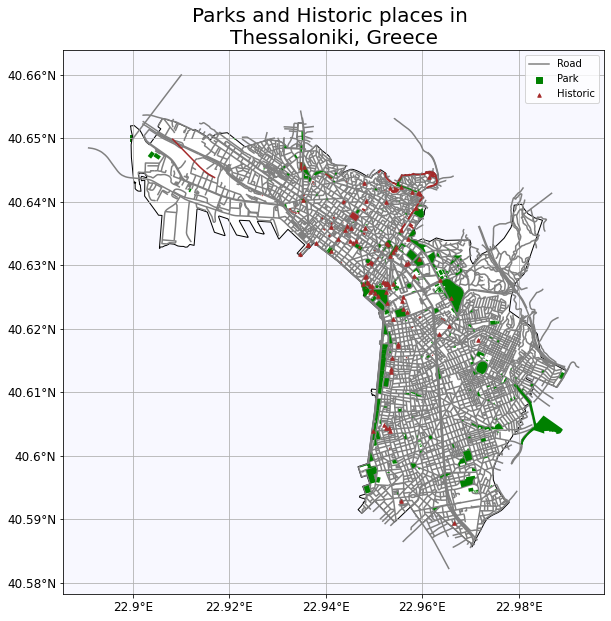

In [6]:
hfont = {'fontname':'Helvetica'}

formatterY = FuncFormatter(lambda y, pos: u'{0:2g}\N{DEGREE SIGN}N'.format(y))
formatterX = FuncFormatter(lambda x, pos: u'{0:2g}\N{DEGREE SIGN}E'.format(x))

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(22.9, 40.65, color = 'green', marker = 's',label = 'Park')
ax.scatter(22.9, 40.65, color = 'brown', marker = '^', s = 12, label = 'Historic', )
ax.plot([22.9,22.91], [40.65, 40.66], color = 'grey', label = 'Road')
plt.legend()
thess2.plot(ax=ax, color = "white", edgecolor = 'black')
geo_parks.plot(ax=ax, facecolor='green', zorder = 10)
geo_hist.plot(ax=ax, facecolor='brown', marker = '^', markersize = 12, color = 'brown', zorder = 10)
geo_road2.plot(ax=ax, facecolor='grey', color = 'grey', zorder = 9)
# water.plot(ax=ax, facecolor='blue', color = 'blue', zorder = 9)
ax.grid()
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_facecolor("ghostwhite")
plt.title('Parks and Historic places in \nThessaloniki, Greece', fontsize = 20, **hfont)
plt.savefig('link.jpg')

In [44]:
import folium

m = folium.Map([40.6347, 22.9362], zoom_start=12, tiles='openstreetmap')
# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}
basemaps['Google Satellite Hybrid'].add_to(m)
folium.GeoJson(geo_parks2['geometry'], style_function=lambda feature, color='green': {
                    'fillColor': color,
                    'color':"green",
                    'weight': 0.5,
                    'dashArray': '6,6',
                    'fillOpacity': 0.8,
                }).add_to(m)
folium.GeoJson(geo_hist2['geometry'], style_function=lambda feature, color='brown': {
                    'fillColor': color,
                    'color':"darkyellow",
                    'weight': 0.5,
                    'dashArray': '6,6',
                    'fillOpacity': 0.8,
                }).add_to(m)
folium.GeoJson(geo_road)
folium.LatLngPopup().add_to(m)
m